<a href="https://colab.research.google.com/github/Josh2903/deeplearningmodel/blob/main/1171103483_1750_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

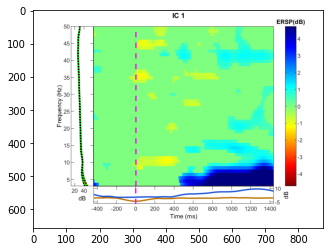

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle

DATADIR = "/content/drive/MyDrive/TIME_FREQ_IMG (1)"

CATEGORIES = ["CON01LH_IMG", "CON01RH_IMG","DYS01L_IMG","DYS01R_IMG"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [ ]:
print(img_array)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [ ]:
print(img_array.shape)

(656, 875, 3)


In [ ]:
IMG_SIZE = 100

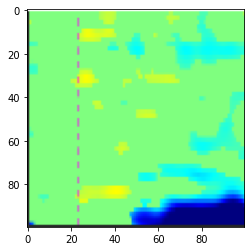

In [ ]:
new_array = img_array[45: 532, 179: 725]
new_array = cv2.resize(new_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [ ]:
training_data = []

In [ ]:
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 128/128 [00:02<00:00, 53.90it/s]

512


In [ ]:
import random

In [ ]:
random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

2
3
3
3
0
1
1
3
2
2


In [ ]:
X = []
y = []

In [ ]:
for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]


In [ ]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0


In [ ]:
y = np.array(y)

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
12/12 [==============================] - 73s 6s/step - loss: -27949017088.0000 - accuracy: 0.2542 - val_loss: -30716002304.0000 - val_accuracy: 0.2403
Epoch 2/10
12/12 [==============================] - 66s 5s/step - loss: -31167793152.0000 - accuracy: 0.2542 - val_loss: -34269179904.0000 - val_accuracy: 0.2403
Epoch 3/10
12/12 [==============================] - 67s 6s/step - loss: -34606546944.0000 - accuracy: 0.2542 - val_loss: -38138961920.0000 - val_accuracy: 0.2403
Epoch 4/10
12/12 [==============================] - 66s 6s/step - loss: -38714105856.0000 - accuracy: 0.2542 - val_loss: -42442665984.0000 - val_accuracy: 0.2403
Epoch 5/10
12/12 [==============================] - 66s 6s/step - loss: -42948747264.0000 - accuracy: 0.2542 - val_loss: -47409815552.0000 - val_accuracy: 0.2403
Epoch 6/10
12/12 [==============================] - 66s 6s/step - loss: -47857651712.0000 - accuracy: 0.2542 - val_loss: -51905945600.0000 - val_accuracy: 0.2403
Epoch 7/10
12/12 [==========